# Main Project

**Submitted By**

    Harkirat Singh
    Contact email: honey.harkiratsingh@gmail.com, (honey.harkirat@outlook.com)

**Submitted To** 

    Mr Karan Mehta
    Course: Machine Learning with Python
    Quantum Learnings, Knowledge Solutions India

## Project Details
These are the 4 projects that are covered in this notebook.

**1. Fraud Dataset (Predicting whether the customers will be a defaulter or not)**<br/>
   
    a. Using SVM Classification (93.04 % Accuracy Score)
    b. Using Custom threshold for strongest filtering (86.081 % Accuracy Score)
    c. Using K Nearest Neighbour Classification (93.41 % Accuracy Score)
    
**2. Diamond Price Prediction (Predicting the prices of diamonds.)**<br/>

    a. Using Multiple Linear Regression (88.52 % Accuracy Score)
    b. Using Artificial Neural Networks (94.3 % Accuracy Score)
    
**3. Company Attrition Data (Whether the employee would leave the company or not)**<br/>

    a. Using K Nearest Neighbour Classification (96.83 % Accuracy Score)
    
**4. House Price Prediction (Predicting house prices)**<br/>

    a. Using Random Forest Regression (100 % Accuracy Score)

## Project Structure

This project aims at studying and analysing all the datasets provided by the institute. This project considers data analysis as the most critical part, because to understand the datasets, the statistics of the data (by visualization) will help to determine which machine learning technique should be implemented. This data analysis forms the first step of my project.

### Data Analysis
For each dataset (or subproject), the first thing that would come is data analysis. It consists of **getting information about various columns and number of rows** present in the dataset, **elimination or substitution of null values** if present, **creation of new columns from existing ones** in case the information provided is raw, and finally the **visualization of the provided data** using *Matplotlib* and *Seaborn* python libraries.

### Splitting the dataset into test and train subsets
In order to evaluate the performance of the machine learning models, testing data is required. Before executing any algorithm, the data would be splitted into two parts:
1. The Training data (almost 67 % of the whole dataset)
2. The Testing data (almost 33 % of the whole dataset)

Only the **training dataset would be used for training the machine learning model**, and after that testing dataset would be used for evaluating the accuracy of the model.

### Feature Scaling
In various algorithms, the units of the raw data can cause serious issues. For example, in case of KNN Algorithm which uses euclidean distance (or even manhatten), if the units of two independent features (columns) are not same then the total distance would be **highly sensitive** to that feature (or column) having big range of values.

So, in order to make sure that all the columns (or features) have same sensitivity, they are scaled to a range of (0, 1) or [-1, 1] using this technique.

**How to create the scaling function?**

The scaling function would be created with respect to the training data (both fitting and transforming as demonstrated in all the projects). And the test data will be *only transformed* instead of fitting.

#### Standardization
This technique centers the values around the mean with a unit standard deviation. So it means, **the mean of the resulting standardized column would be zero**.

The formula,

$ X' = \frac{X - \mu}{\Sigma} $

is used for standardizing the data.

#### Normalization
In this technique, the values are shifted and rescaled using the minimum and maximum values present in the data, so that the range is (0, 1).

The formula, 

$ X' = \frac{X - X_{min}}{X_{max} - X_{min}} $

is used for normalizing the data.

### Training the model
After all the data preprocessing and analysis has been done, the final mode is trained in this step.

### Testing and Visualization
This phase consists of evaluation of the model, and the visualization of the model to gain insights how it works.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Other libraries (like sklearn, keras, etc) would be imported whenever they are required.

## Custom Defined Functions

Below function is a helper function, that can extract maximum value from a given accuracy list.

In [2]:
def GetMaxKV(Accu : list):
    max_index = 0
    max_value = 0.0
    for i, v in Accu:
        if max_value < v:
            max_value = v
            max_index = i
    return max_index, max_value

Below function is used to test a model with custom threshold value.

In [3]:
def predict_threshold(model, X_test, threshold):
    return np.where(model.predict_proba(X_test)[:, 1] > threshold, 1, 0)

## Project - 1 (Fraud Dataset)

***The business problem would be discussed after importing the dataset.***

In [4]:
fraudDF = pd.read_csv('./Datasets/fraud_dataset.csv')
fraudDF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


### Business Problem Details

A dataset is given. It contains the details of customers who have taken a loan from the bank. The customer details such as gender, marital status, dependents, education status, self employed, various income data, and the details regarding amount etc are provided. 

#### The Problem

A Machine learning model has to be constructed out of the given dataset. And this model would be useful in various business situations for example, the bank can predict if there is any chance whether a customer who wants to take a loan, can become a defaulter or not. In such cases, the bank would first prefer those customers who are predicted as *safe* by the machine learning model.


### Information of the dataset

In [5]:
fraudDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


### Analysis

In [6]:
fraudDF.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

This dataset has no null value.

In [7]:
fraudDF.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.733978,0.481258,0.652963,0.790810,0.574365,5212.970979,1486.050786,140.892382,338.128174,0.885127,0.654172,1.978235,0.576784
std,0.442143,0.499951,0.935835,0.406976,0.494738,5593.713304,2802.847983,79.820451,75.353151,0.319062,0.475925,0.771471,0.494368
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2894.500000,0.000000,100.000000,360.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,3752.000000,0.000000,125.000000,360.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,5478.000000,2177.000000,156.500000,360.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,3.000000,1.000000


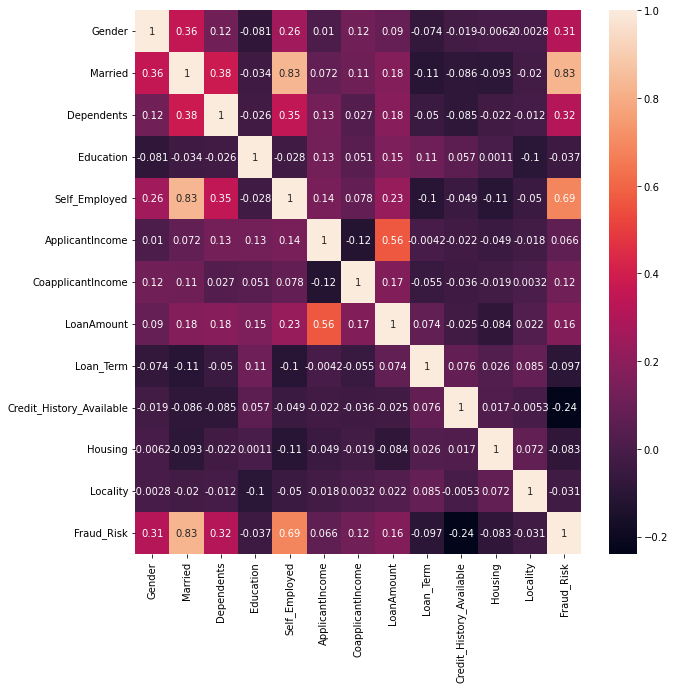

In [8]:
plt.figure(figsize = (10, 10))

sns.heatmap(fraudDF.corr(), annot = True);

From the heatmap, it can be observed that the minimum variability is between **Fraud_Risk column and Education column (-0.037)** It means, it is difficult to distinguish. **The closer the number to 0, more it is difficult to distinguish (weak relationship).**

The plots look like:

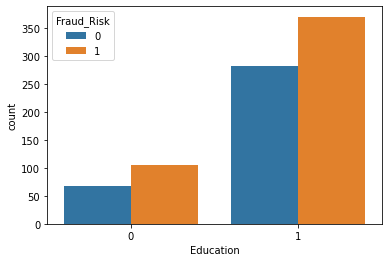

In [9]:
sns.countplot(x = 'Education', hue = 'Fraud_Risk', data = fraudDF);

Although, the customers who are educated has high chance of being defaulter, but also the number of non risk customers is also high. It means another parameters are required to distinguish properly.

**Between Married and Fraud_Risk columns, correlation is 0.83 (from heatmap).**

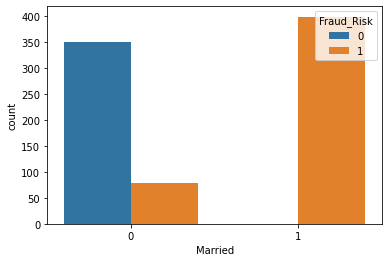

In [10]:
sns.countplot(x = 'Married', hue = 'Fraud_Risk', data = fraudDF);

This shows clear distinction between fraud risk and non risk customers.

**Between Gender and Fraud_Risk columns, correlation is 0.31 (from heatmap).**

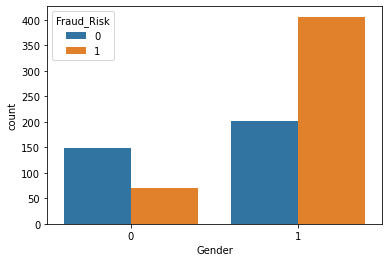

In [11]:
sns.countplot(x = 'Gender', hue = 'Fraud_Risk', data = fraudDF);

Again this is weak relation.

**Between Self_Employed and Fraud_Risk, correlation is 0.69.**

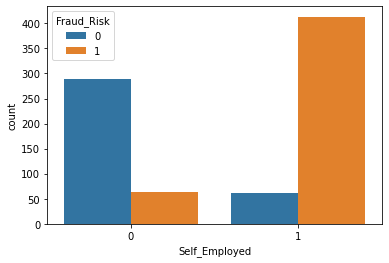

In [12]:
sns.countplot(x = 'Self_Employed', hue = 'Fraud_Risk', data = fraudDF);

It has more clear distinction.

**Between Credit_History_Available and Fraud_Risk the correlation is 0.24.**

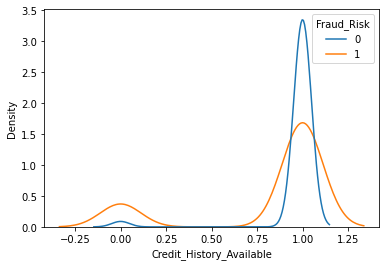

In [13]:
sns.kdeplot(x = 'Credit_History_Available', hue = 'Fraud_Risk', data = fraudDF);

***Note since Credit_History_Available has non discrete values, KDE Plot is used.***

**Other columns having correlation with Fraud_Risk, closer to 0**.

All other plots are between Fraud_Risk and the columns having non discrete values (like value belonging to a range). And since all other columns have correlation with Fraud_Risk closer to 0, it means that they are difficult to distinguish. The lines of *Fraud Risk* and *Not Fraud Risk* are very near to each other.

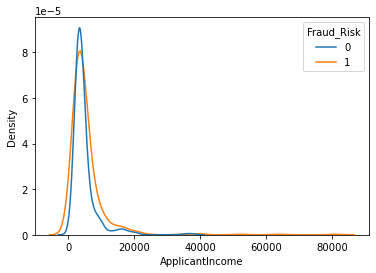

In [14]:
sns.kdeplot(x = 'ApplicantIncome', hue = 'Fraud_Risk', data = fraudDF);

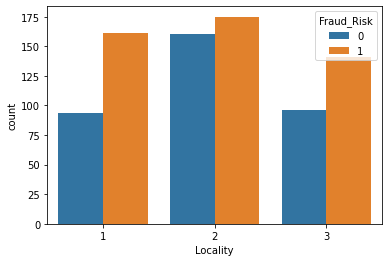

In [15]:
sns.countplot(x = 'Locality', hue = 'Fraud_Risk', data = fraudDF);

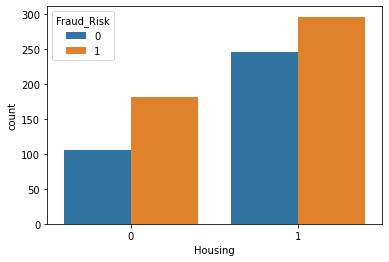

In [16]:
sns.countplot(x = 'Housing', hue = 'Fraud_Risk', data = fraudDF);

All the features need to be considered together, because each feature is independent of other features. Hence clustering algorithm cannot be used. Also each feature is independent of other features, it means there is no mathematical relation. So Logistic Regression would give very poor result. The maximum accuracy that might be achieved would be near to 80 % if only Married and Fraud_Risk columns are considered. But the project requirements states that more than 85% of accuracy is required. 

Hence, KNN Alogrithm shall be used to build this machine learning model.

### Independent and Dependent Features

In [17]:
fraud_X = fraudDF.iloc[:, :-1]
fraud_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
0,1,0,0,1,0,5849,0,146,360,1,1,1
1,1,1,1,1,1,4583,1508,128,360,1,1,3
2,1,1,0,1,1,3000,0,66,360,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1


In [18]:
fraud_y = fraudDF.iloc[:, -1]
fraud_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Fraud_Risk, dtype: int64

### Splitting the data 

In [19]:
from sklearn.model_selection import train_test_split

fraud_X_train, fraud_X_test, fraud_y_train, fraud_y_test = train_test_split(fraud_X, fraud_y, test_size = 0.33, 
                                                                            stratify = fraudDF['Fraud_Risk'], 
                                                                            random_state = 43)

### Standardizing the data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fraud_X_train = scaler.fit_transform(fraud_X_train)
fraud_X_test = scaler.transform(fraud_X_test)

### Using the SVM Classification

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

fraud_svm_classifier = SVC(probability = True)
fraud_svm_classifier.fit(fraud_X_train, fraud_y_train)
pred_svm_fraud = fraud_svm_classifier.predict(fraud_X_test)

print(f'Accuracy: {round(accuracy_score(fraud_y_test, pred_svm_fraud) * 100, 2)} %')

Accuracy: 93.04 %


#### The confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(fraud_y_test, pred_svm_fraud)

array([[114,   2],
       [ 17, 140]], dtype=int64)

#### The Classification Report

In [23]:
from sklearn.metrics import classification_report

print(classification_report(fraud_y_test, pred_svm_fraud))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       116
           1       0.99      0.89      0.94       157

    accuracy                           0.93       273
   macro avg       0.93      0.94      0.93       273
weighted avg       0.94      0.93      0.93       273



#### Creating the strongest model for eliminating risky customers

In [24]:
strongest_filter = 17
strongest_filter_threshold = 0

for i in np.round(np.arange(0, 1, 0.005), 3):
    y_predict = predict_threshold(fraud_svm_classifier, fraud_X_test, i)
    cfm = confusion_matrix(fraud_y_test, y_predict)
    acc = accuracy_score(fraud_y_test, y_predict)
    if cfm[1][0] < strongest_filter and acc > 0.85:
        strongest_filter = cfm[1][0]
        strongest_filter_threshold = i

print('Threshold :', strongest_filter_threshold)
strongest_fraud_pred = predict_threshold(fraud_svm_classifier, fraud_X_test, strongest_filter_threshold)
print(confusion_matrix(fraud_y_test, strongest_fraud_pred))
print('Accuracy Score: ', np.round(accuracy_score(fraud_y_test, strongest_fraud_pred), 5) * 100, '%')

Threshold : 0.115
[[ 82  34]
 [  4 153]]
Accuracy Score:  86.081 %


At the above threshold, it can put a few of the actual risky customers in the risk category. However, it will also put some non risky customers in risk category.

The above threshold can be used when there is a need of strong identification of risky customers. However, it might also mistakenly identify non risk customers as risky ones.

##### Without threshold

In [25]:
pred_svm_fraud = fraud_svm_classifier.predict(fraud_X_test)

print(f'Accuracy Score: {round(accuracy_score(fraud_y_test, pred_svm_fraud) * 100, 2)} %')

Accuracy Score: 93.04 %


### Using the K - Nearest Neighbours Classification

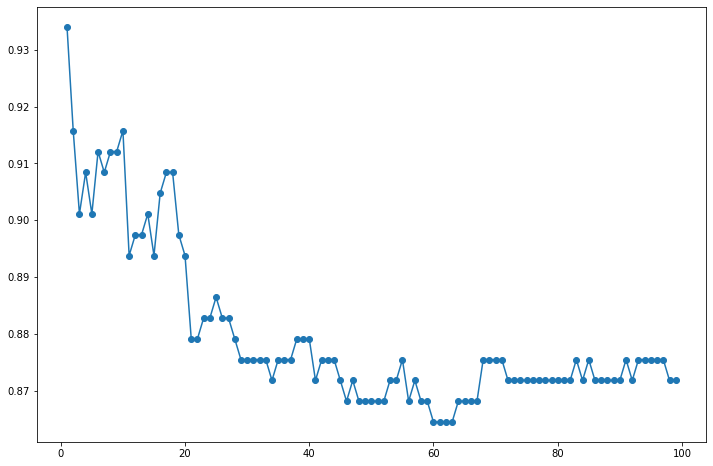

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Accu = list()
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(fraud_X_train, fraud_y_train)
    pred_i = knn.predict(fraud_X_test)
    Accu.append((i, accuracy_score(fraud_y_test, pred_i)))
    
Accu = np.array(Accu)

plt.figure(figsize = (12, 8))
plt.scatter(np.reshape(Accu[:, 0], (-1, 1)), np.reshape(Accu[:, 1], (-1, 1)))
plt.plot(np.reshape(Accu[:, 0], (-1, 1)), np.reshape(Accu[:, 1], (-1, 1)));

#### Accuracy

In [27]:
max_index, max_value = GetMaxKV(Accu)
print(f'The maximum accuracy is {round(max_value * 100, 2)} % for k = {max_index} neighbours.')

The maximum accuracy is 93.41 % for k = 1.0 neighbours.


In [28]:
fraud_classifier = KNeighborsClassifier(n_neighbors = int(max_index))
fraud_classifier.fit(fraud_X_train, fraud_y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
fraud_y_pred = fraud_classifier.predict(fraud_X_test)

acc = accuracy_score(fraud_y_test, fraud_y_pred)
print(f'This model has an accuracy of {round(acc * 100, 2)} %.')

This model has an accuracy of 93.41 %.


#### The Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(fraud_y_test, fraud_y_pred)

array([[110,   6],
       [ 12, 145]], dtype=int64)

From the above matrix, it can be observed that 12 people who were actually in fraud risk category were identified to be safe from any risk.

Since this model is based on calculating the nearest neighbours and then deciding what maximum neighbours belong to which category, the threshold will not have any effect on this model.

In [31]:
print(classification_report(fraud_y_test, fraud_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       116
           1       0.96      0.92      0.94       157

    accuracy                           0.93       273
   macro avg       0.93      0.94      0.93       273
weighted avg       0.94      0.93      0.93       273



### Final Conclusion

If there is a need of avoiding people having slightest chance of any risk, then the SVM Model with 0.115 threshold as discussed above (in detail) can be used.

However, if the accuracy is the main concern, then the K - Nearest Neighbour Classifier can be used.

## Project - 2 (Diamond Price Prediction)

***The Business problem will be discussed after importing the dataset.***

In [32]:
diamondDF = pd.read_csv('./Datasets/Diamond Price Prediction.csv')
diamondDF.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Information of dataset

In [33]:
diamondDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Business Problem

The dataset of diamonds is provided. It contains various details like carat, cut, color, clarity, depth, table, price, x, y and z etc. The problem is to make a machine learning model, which can learn from the provided data and then predict the price of diamonds from the details provided to it.
This model should be able to make enough accurate predictions that the predicted prices are at least 85 % accurate.

### Analysis

In [34]:
diamondDF.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Removing the Unnamed: 0 column
This is an indexing column, it is not required.

In [35]:
diamondDF.drop(columns = ['Unnamed: 0'], inplace = True)
diamondDF.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [36]:
diamondDF.shape

(53940, 10)

This is a large dataset.

### Checking if this dataset has null values

In [37]:
diamondDF.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Using Label Encoder to encode the cut, color and clarity column

In [38]:
print(diamondDF['cut'].value_counts())
print(diamondDF['color'].value_counts())
print(diamondDF['clarity'].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [39]:
from sklearn.preprocessing import LabelEncoder

diamond_cut_le = LabelEncoder()
diamond_color_le = LabelEncoder()
diamond_clarity_le = LabelEncoder()

diamondDF['cut'] = diamond_cut_le.fit_transform(diamondDF['cut'])
diamondDF['color'] = diamond_color_le.fit_transform(diamondDF['color'])
diamondDF['clarity'] = diamond_clarity_le.fit_transform(diamondDF['clarity'])

In [40]:
print(diamondDF['cut'].value_counts())
print(diamondDF['color'].value_counts())
print(diamondDF['clarity'].value_counts())

2    21551
3    13791
4    12082
1     4906
0     1610
Name: cut, dtype: int64
3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64
2    13065
5    12258
3     9194
4     8171
7     5066
6     3655
1     1790
0      741
Name: clarity, dtype: int64


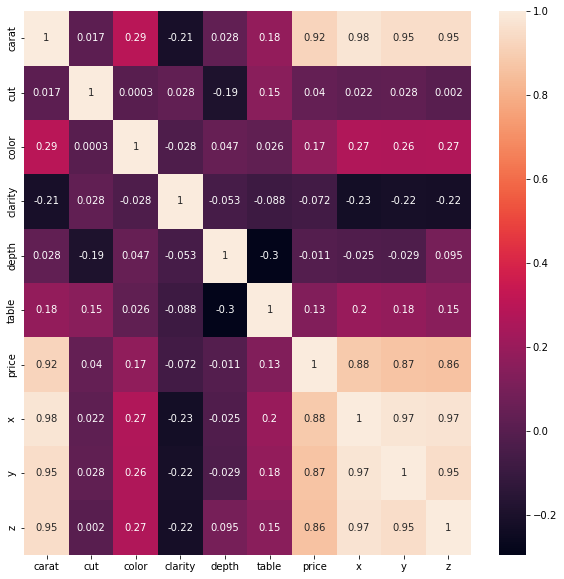

In [41]:
plt.figure(figsize = (10, 10))

sns.heatmap(diamondDF.corr(), annot = True);

This dataset is very large, that it would talk a long time to calculate and plot pair plots.

#### Scatter plot

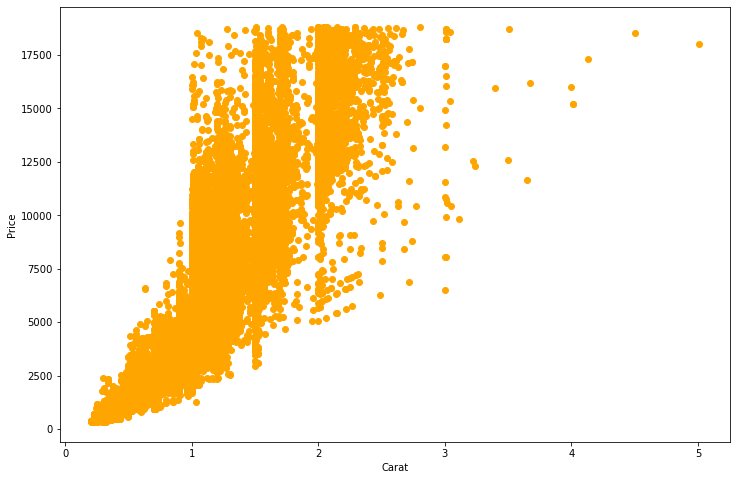

In [42]:
plt.figure(figsize = (12, 8))

plt.scatter(diamondDF['carat'], diamondDF['price'], c = 'orange')

plt.xlabel('Carat')
plt.ylabel('Price');

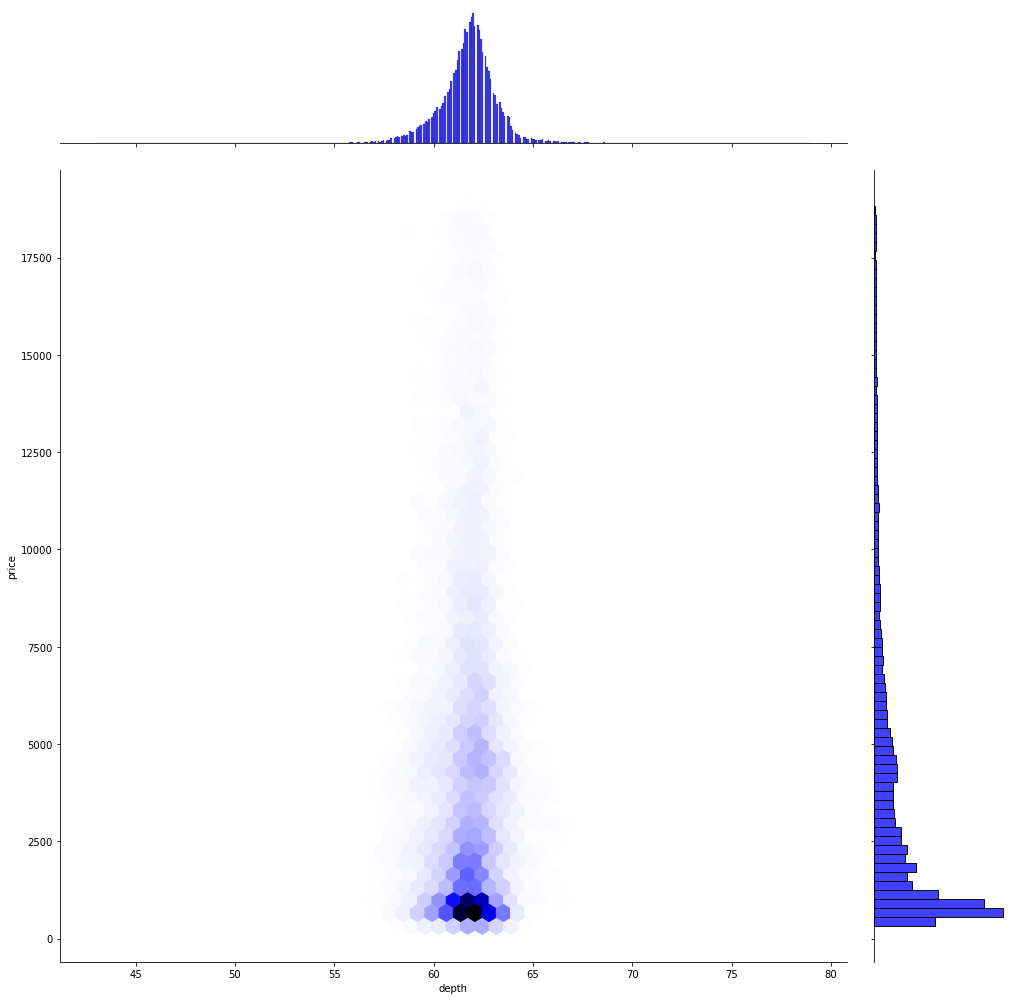

In [43]:
sns.jointplot(x = diamondDF['depth'], y = diamondDF['price'], kind = 'hex', color = 'blue', height = 14);

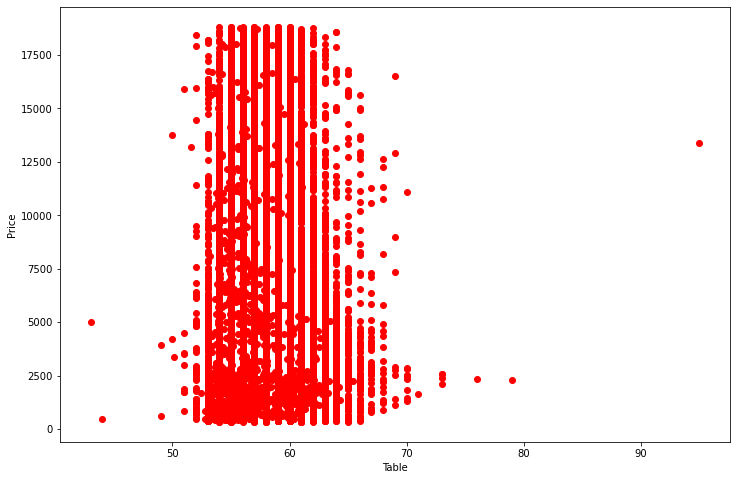

In [44]:
plt.figure(figsize = (12, 8))

plt.scatter(diamondDF['table'], diamondDF['price'], c = 'red')

plt.xlabel('Table')
plt.ylabel('Price');

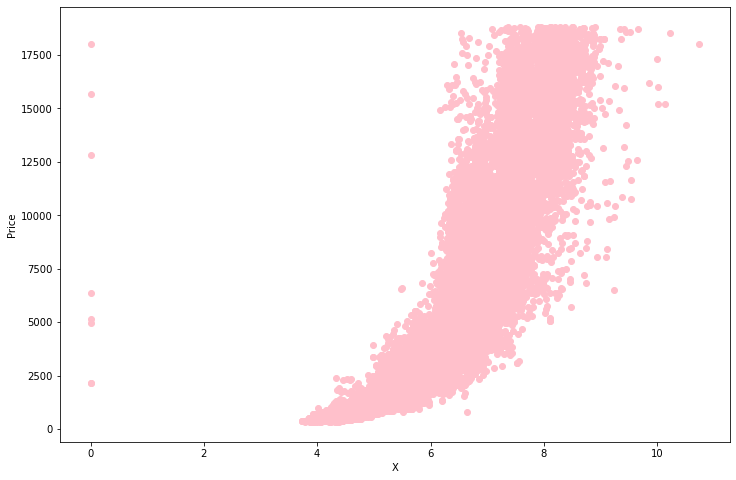

In [45]:
plt.figure(figsize = (12, 8))

plt.scatter(diamondDF['x'], diamondDF['price'], c = 'pink')

plt.xlabel('X')
plt.ylabel('Price');

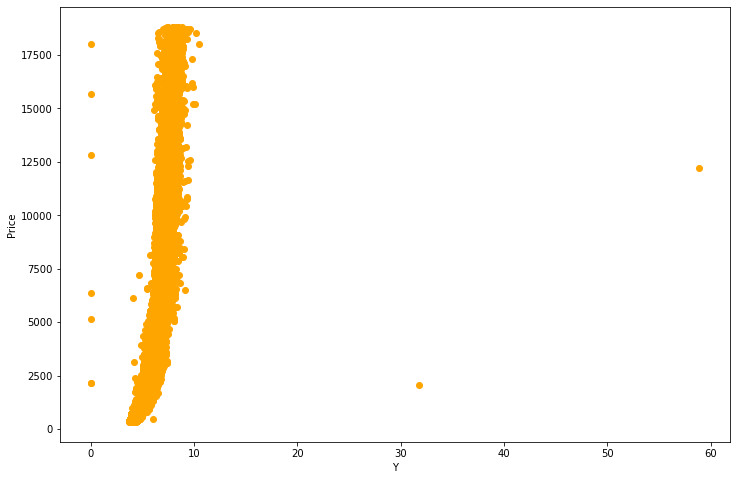

In [46]:
plt.figure(figsize = (12, 8))

plt.scatter(diamondDF['y'], diamondDF['price'], c = 'orange')

plt.xlabel('Y')
plt.ylabel('Price');

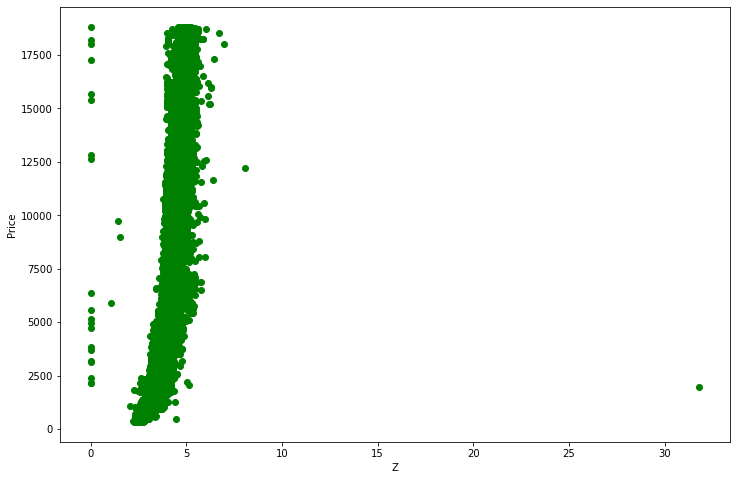

In [47]:
plt.figure(figsize = (12, 8))

plt.scatter(diamondDF['z'], diamondDF['price'], c = 'green')

plt.xlabel('Z')
plt.ylabel('Price');

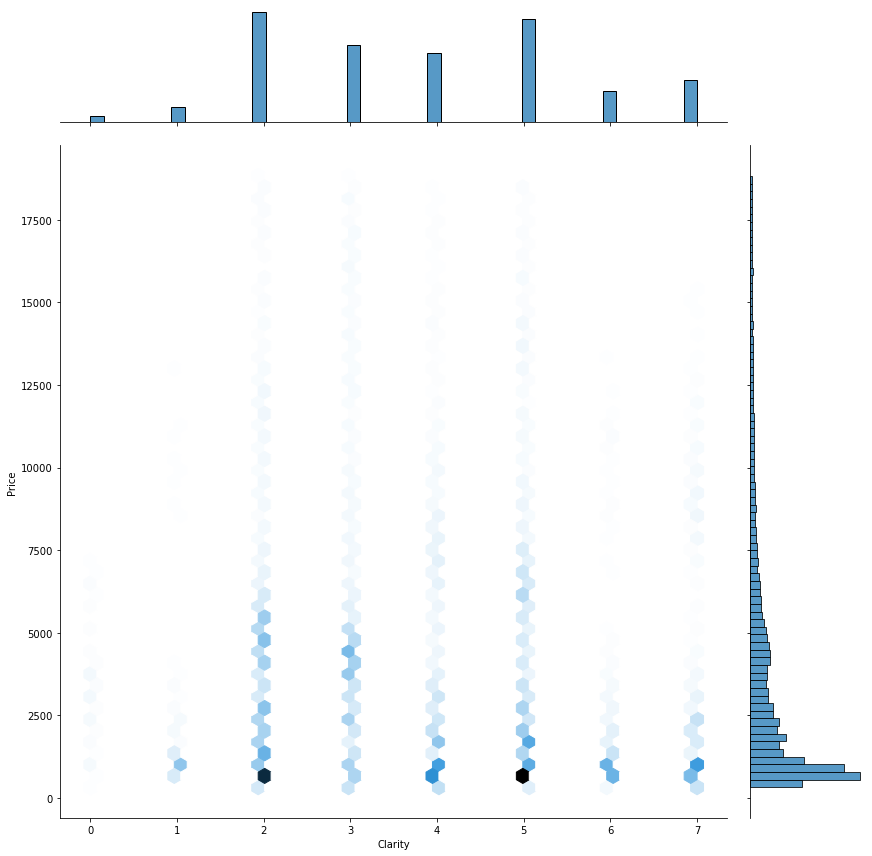

In [48]:
sns.jointplot(x = diamondDF['clarity'], y = diamondDF['price'], kind = 'hex', height = 12)

plt.xlabel('Clarity')
plt.ylabel('Price');

This problem would be solved with the following techniques:

1. Using Multiple Linear Regression
2. Using Artificial Nerual Networks

### Independent and Dependent Features

##### All columns

In [49]:
diamondDF.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [50]:
diamond_X = diamondDF.drop(columns = ['price'])
diamond_X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [51]:
diamond_y = diamondDF.iloc[:, 6]
diamond_y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

#### Splitting the dataset

In [52]:
from sklearn.model_selection import train_test_split

diamond_X_train, diamond_X_test, diamond_y_train, diamond_y_test = train_test_split(diamond_X, diamond_y, test_size = 0.33, 
                                                                                    random_state = 43)

#### Standardizing the datasets

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

diamond_X_train = scaler.fit_transform(diamond_X_train)
diamond_X_test = scaler.transform(diamond_X_test)

### Using Multiple Linear Regression

#### Creating the model

In [54]:
from sklearn.linear_model import LinearRegression

multiple_reg = LinearRegression()

In [55]:
multiple_reg.fit(diamond_X_train, diamond_y_train)

LinearRegression()

#### Testing the model

In [56]:
from sklearn.metrics import r2_score

diamond_y_pred = multiple_reg.predict(diamond_X_test)

In [57]:
print(f'The accuracy of the above trained model is approximately {round(r2_score(diamond_y_test, diamond_y_pred) * 100, 2)} %.')

The accuracy of the above trained model is approximately 88.52 %.


<hr>

*SVM took about 5 minutes to train. And same amount of time even for testing. And the R2 score was around 83% for linear type of kernel and standardized data. And for other kernel types it was even less. Since the project requirements state that the score must be more than 85%, therefore SVM model is discarded.*

<hr>

### Using the Artificial Neural Networks

In [58]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [59]:
model=Sequential()

#First Layer
model.add(Dense(9, activation = "relu", input_dim = 9))

for i in range(3):
    model.add(Dense(units = 27, activation = "relu"))

#Output Layer
model.add(Dense(units = 1))

#Compiling the ANN
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ['mae', 'mse', 'mape'])

#Fitting the ANN to the training Dataset
model.fit(diamond_X_train, diamond_y_train, batch_size = 30, epochs = 100)

Epoch 1/100
1205/1205 [==============================] - 4s 2ms/step - loss: 6953664.5000 - mae: 1372.3706 - mse: 6953664.5000 - mape: 41.4379
Epoch 2/100
1205/1205 [==============================] - 3s 2ms/step - loss: 1602700.3750 - mae: 717.5458 - mse: 1602700.3750 - mape: 23.8950
Epoch 3/100
1205/1205 [==============================] - 3s 2ms/step - loss: 1488335.5000 - mae: 698.2144 - mse: 1488335.5000 - mape: 24.3226
Epoch 4/100
1205/1205 [==============================] - 3s 2ms/step - loss: 1407846.2500 - mae: 680.8730 - mse: 1407846.2500 - mape: 23.9194
Epoch 5/100
1205/1205 [==============================] - 3s 2ms/step - loss: 1339964.0000 - mae: 662.6890 - mse: 1339964.0000 - mape: 23.2231
Epoch 6/100
1205/1205 [==============================] - 3s 2ms/step - loss: 1291291.0000 - mae: 647.3705 - mse: 1291291.0000 - mape: 22.6555
Epoch 7/100
1205/1205 [==============================] - 3s 2ms/step - loss: 1239687.3750 - mae: 631.8548 - mse: 1239687.3750 - mape: 21.7940
Epoch

1205/1205 [==============================] - 3s 2ms/step - loss: 943075.5625 - mae: 519.4711 - mse: 943075.5625 - mape: 14.8239
Epoch 59/100
1205/1205 [==============================] - 3s 2ms/step - loss: 938579.5000 - mae: 518.1314 - mse: 938579.5000 - mape: 14.7198
Epoch 60/100
1205/1205 [==============================] - 3s 2ms/step - loss: 937323.0625 - mae: 517.9427 - mse: 937323.0625 - mape: 14.6881
Epoch 61/100
1205/1205 [==============================] - 3s 2ms/step - loss: 935701.5000 - mae: 517.7393 - mse: 935701.5000 - mape: 14.7239
Epoch 62/100
1205/1205 [==============================] - 3s 2ms/step - loss: 935647.5000 - mae: 516.6925 - mse: 935647.5000 - mape: 14.6676
Epoch 63/100
1205/1205 [==============================] - 3s 2ms/step - loss: 934359.3125 - mae: 516.8128 - mse: 934359.3125 - mape: 14.6577
Epoch 64/100
1205/1205 [==============================] - 3s 2ms/step - loss: 929782.6875 - mae: 515.3497 - mse: 929782.6875 - mape: 14.5838
Epoch 65/100
1205/1205 [==

In [60]:
model.evaluate(diamond_X_test, diamond_y_test)

557/557 [==============================] - 1s 2ms/step - loss: 916414.3125 - mae: 503.5201 - mse: 916414.3125 - mape: 14.1053


[916414.3125, 503.5201416015625, 916414.3125, 14.105281829833984]

In [61]:
diamond_y_pred = model.predict(diamond_X_test)

557/557 [==============================] - 1s 2ms/step


In [62]:
print(f'The accuracy of the above trained model is approximately {round(r2_score(diamond_y_test, diamond_y_pred) * 100, 2)} %.')

The accuracy of the above trained model is approximately 94.3 %.


### Final Conclusion

Both of the models have accuracy more than 85%. Thus, they can be used to make reliable predictions regarding diamond prices. 

## Project - 3 (Company Attrition Data)

***Business problem will be discussed after importing the company attrition dataset.***

In [63]:
compAttDF = pd.read_csv('Datasets/Company Attrition Data.csv')
compAttDF.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Information of dataset

In [64]:
compAttDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Business Problem

A dataset of a company having employee details is provided. And the problem is to predict what chances are there whether an employee would leave or not. This can help a company to estimate how many employees may leave in future, and they can take advance steps like hiring new employees or improving the work environment by listening to employee's complaints.

### Null values

In [65]:
compAttDF.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

### Analysis

In [66]:
compAttDF.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


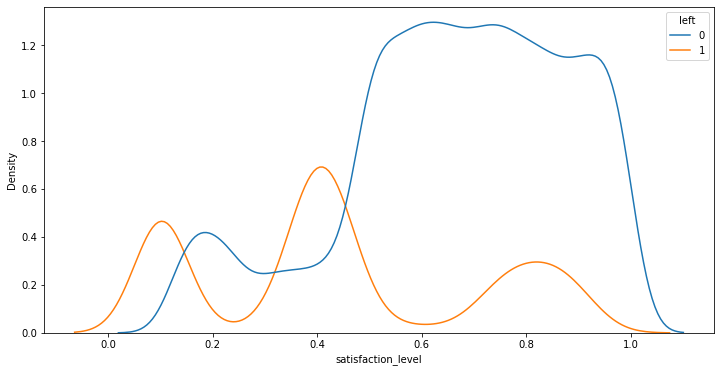

In [67]:
plt.figure(figsize = (12, 6))

sns.kdeplot(x = 'satisfaction_level', 
            hue = 'left', 
            data = compAttDF);

From the above graph it can be inferred that employees having good satisfaction level stayed in the company.

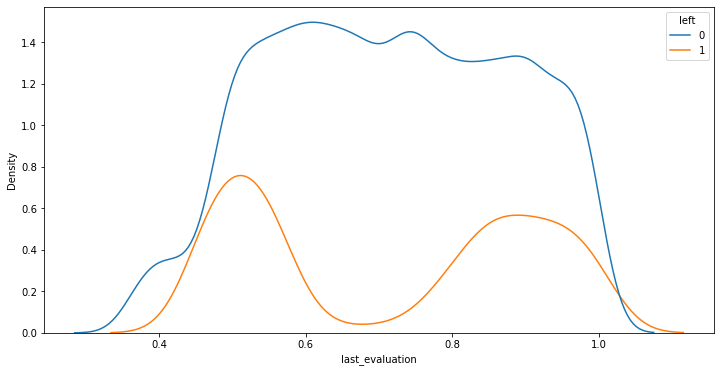

In [68]:
plt.figure(figsize = (12, 6))

sns.kdeplot(x = 'last_evaluation', 
            hue = 'left', 
            data = compAttDF);

Looks like there is no strong connection between Last Evaluation and the chance of an employee leaving the company.

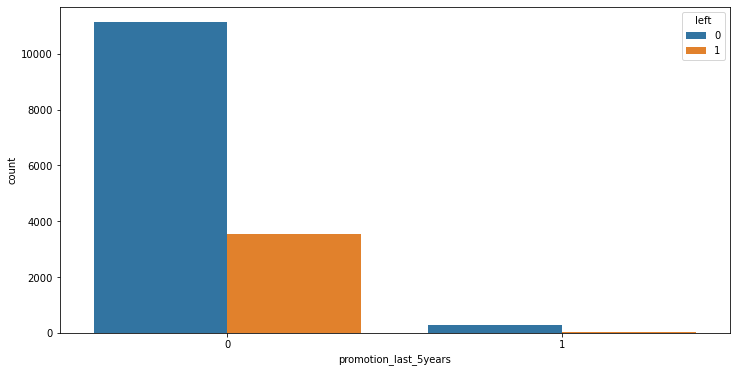

In [69]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'promotion_last_5years', 
              hue = 'left', data = compAttDF);

Still a weak connection. It means not getting promoted is not a major reason for the employees to leave the company.

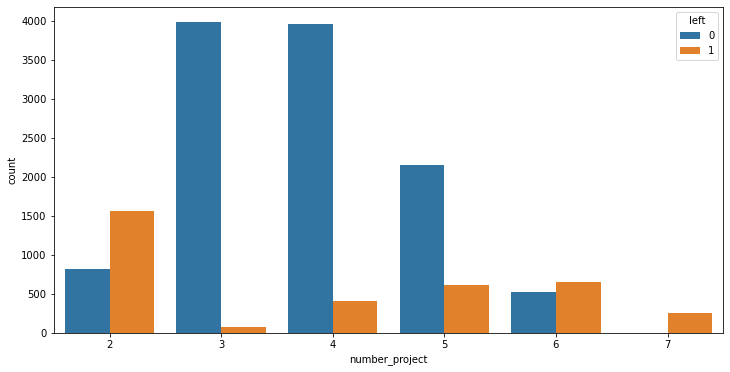

In [70]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'number_project', 
              hue = 'left', 
              data = compAttDF);

The employees who have completed 3, 4 or 5 number of projects had a high chance of staying. 

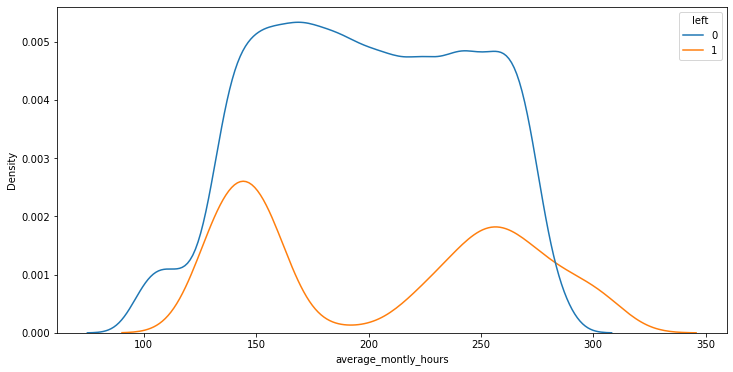

In [71]:
plt.figure(figsize = (12, 6))

sns.kdeplot(x = 'average_montly_hours', 
            hue = 'left', data = compAttDF);

Some people left the company who had more that 300 monthly hours.

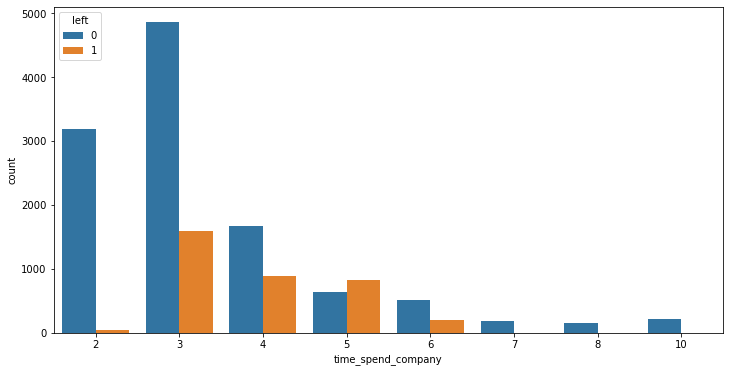

In [72]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'time_spend_company', 
              hue = 'left', 
              data = compAttDF);

It looks like employees who worked 2 or 3 years, stayed in the company. And also those employees who worked for more than 6 years stayed in the company. Others had appreciable number of chances for leaving the company.

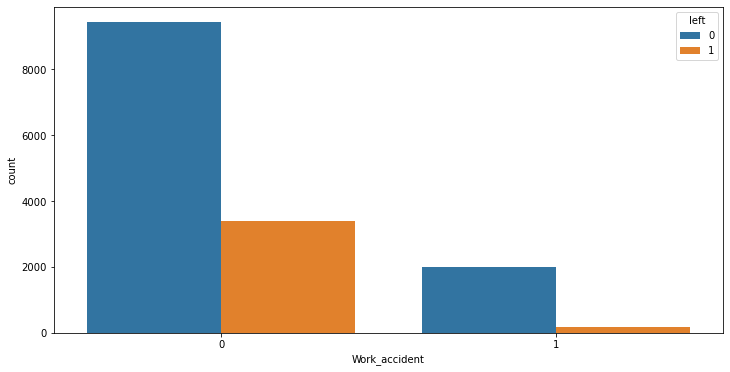

In [73]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'Work_accident', 
              hue = 'left', 
              data = compAttDF);

Work accidents may not be one of the major reasons an employee might leave a company.

In [74]:
compAttDF['Sales_Occured'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Sales_Occured, dtype: int64

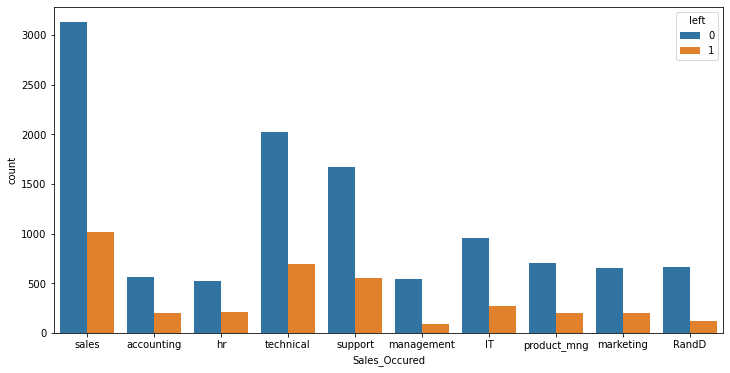

In [75]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'Sales_Occured', 
              hue = 'left', 
              data = compAttDF);

Most of the people who left the company belonged to sales, technical and support departments. (The red coloured label).

In [76]:
compAttDF['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

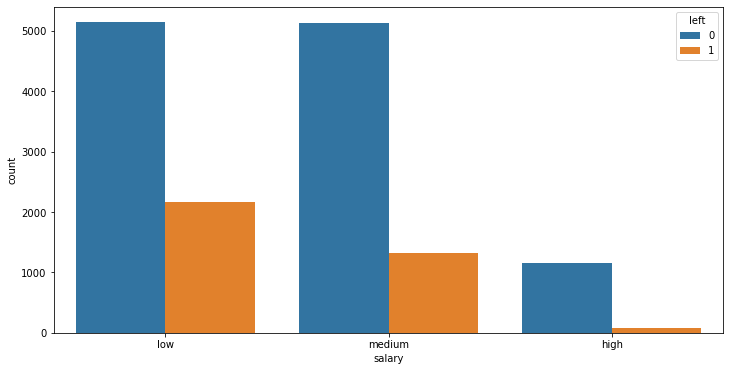

In [77]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'salary', 
              hue = 'left', 
              data = compAttDF);

Employees having low and medium salary had a chance of leaving the company.

### Using Label Encoder to encode the salary and Sales_Occured departments

In [78]:
from sklearn.preprocessing import LabelEncoder

sales_le = LabelEncoder()
salary_le = LabelEncoder()

In [79]:
compAttDF['Sales_Occured'] = sales_le.fit_transform(compAttDF['Sales_Occured'])
compAttDF['salary'] = salary_le.fit_transform(compAttDF['salary'])

### Independent and Dependent Features

In [80]:
X_compAttDF = compAttDF.drop(columns = ['left'])
X_compAttDF.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [81]:
y_compAttDF = compAttDF['left']
y_compAttDF.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### Stratified Splitting into Test and Training Data

In [82]:
from sklearn.model_selection import train_test_split

X_compAttDF_train, X_compAttDF_test, y_compAttDF_train, y_compAttDF_test = train_test_split(X_compAttDF, y_compAttDF, 
                                                                                            test_size = 0.33,
                                                                                            stratify = compAttDF['left'],
                                                                                            random_state = 43)

### Standardizing the Datasets

In [83]:
from sklearn.preprocessing import StandardScaler

compAtt_scaler = StandardScaler()

X_compAttDF_train = compAtt_scaler.fit_transform(X_compAttDF_train)
X_compAttDF_test = compAtt_scaler.transform(X_compAttDF_test)

### Choosing the best K value

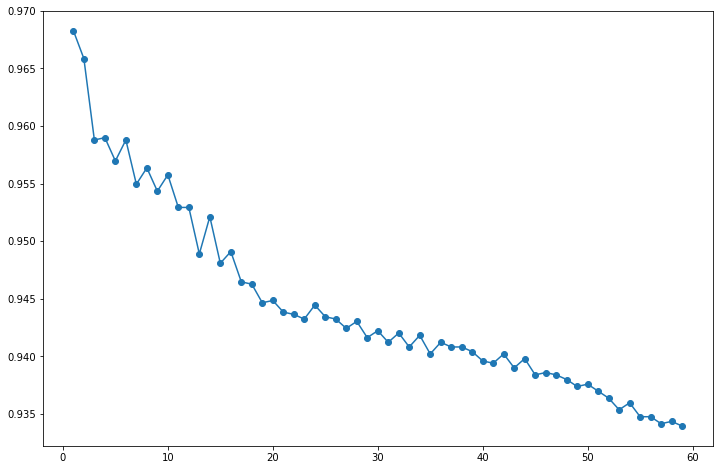

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Accu = list()
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_compAttDF_train, y_compAttDF_train)
    pred_i = knn.predict(X_compAttDF_test)
    Accu.append((i, accuracy_score(y_compAttDF_test, pred_i)))
    
Accu = np.array(Accu)

plt.figure(figsize = (12, 8))
plt.scatter(np.reshape(Accu[:, 0], (-1, 1)), np.reshape(Accu[:, 1], (-1, 1)))
plt.plot(np.reshape(Accu[:, 0], (-1, 1)), np.reshape(Accu[:, 1], (-1, 1)));

In [85]:
max_index, max_value = GetMaxKV(Accu)
print(f'The maximum accuracy is {round(max_value * 100, 2)} % for k = {max_index} neighbours.')

The maximum accuracy is 96.83 % for k = 1.0 neighbours.


### Final Model

In [86]:
classifier = KNeighborsClassifier(n_neighbors = int(max_index))
classifier.fit(X_compAttDF_train, y_compAttDF_train)

KNeighborsClassifier(n_neighbors=1)

### Accuracy Tests

In [87]:
y_compAttDF_pred = classifier.predict(X_compAttDF_test)

acc = accuracy_score(y_compAttDF_test, y_compAttDF_pred)
print(f'This model has an accuracy of {round(acc * 100, 2)} %.')

This model has an accuracy of 96.83 %.


### Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_compAttDF_test, y_compAttDF_pred)

array([[3659,  112],
       [  45, 1134]], dtype=int64)

In [89]:
print(classification_report(y_compAttDF_test, y_compAttDF_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3771
           1       0.91      0.96      0.94      1179

    accuracy                           0.97      4950
   macro avg       0.95      0.97      0.96      4950
weighted avg       0.97      0.97      0.97      4950



### Final Conclusion

The above trained model can help to identify whether an employee would leave or not. The KNN classifier is very helpful. Theoretically, employees having interactions and those who discuss same things regarding the company structure, having the probability that they might take decisions together.

Another criteria is such that most of the employees leave the company because of similar reasons, there is very less chance, that they have to leave suddenly. Most of the time, it is the environment, treatment by the company which forces the employees to leave. The KNN algorithm calculates whether the given employee details matches with an employee who left or not based on the parameters that a company know. 

If the company monitors the employee data closely, then more accurate machine learning models can be constructed.

## Project - 4 (House Price Prediction)

***Business Problem shall be discussed after importing the dataset.***

In [90]:
houseDF = pd.read_csv('./Datasets/house_price.csv')
houseDF.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


### Business Problem

This dataset consists of data about the kinds of houses (in Bommanahalli and Whitefield) and their prices. The objective is to make a machine learning price regression model that can accurately predict the house prices based on the user's requirements.

### Description of the dataset

In [91]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


#### Presence of null values

In [92]:
houseDF.isnull().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

### Analysis

In [93]:
houseDF['Location'].value_counts()

Bommanahalli    504
Whitefield      496
Name: Location, dtype: int64

In [94]:
houseDF['Furnishing'].value_counts()

0    652
1    348
Name: Furnishing, dtype: int64

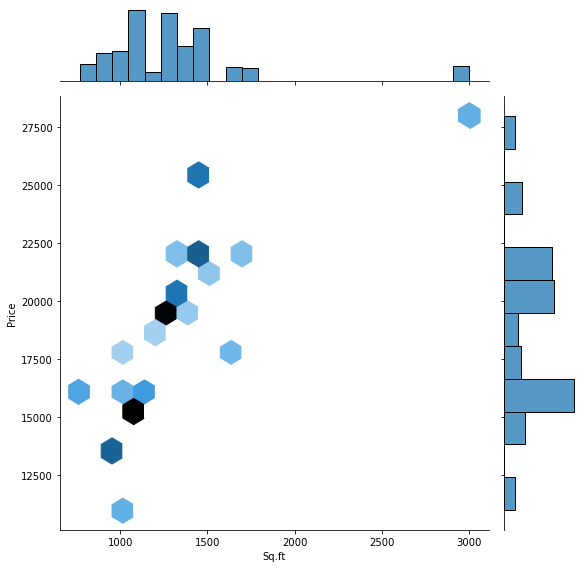

In [95]:
sns.jointplot(x = 'Sq.ft', y = 'Price', 
              data = houseDF[
                  houseDF['Location'] == 'Bommanahalli'
              ], 
              kind = 'hex', height = 8);

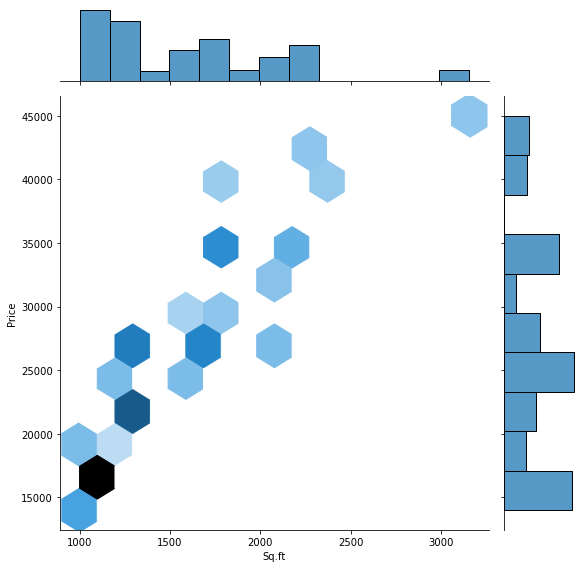

In [96]:
sns.jointplot(x = 'Sq.ft', y = 'Price', 
              data = houseDF[
                  houseDF['Location'] == 'Whitefield'
              ], kind = 'hex', height = 8);

Variability of house prices with respect to area and location.

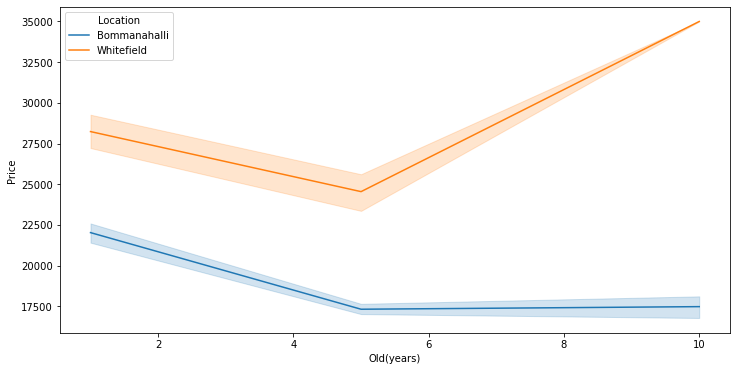

In [97]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = 'Old(years)', y = 'Price', hue = 'Location', data = houseDF);

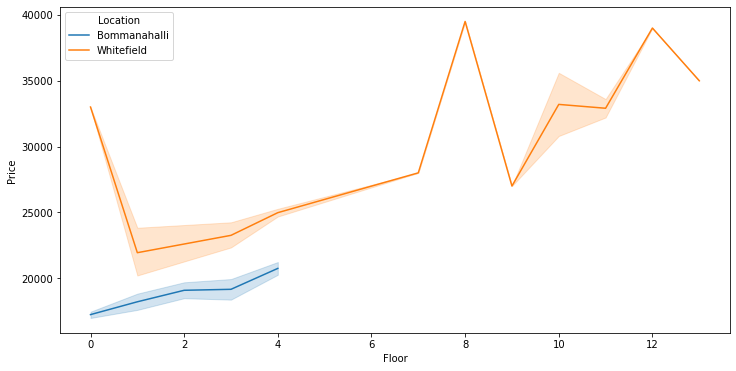

In [98]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = 'Floor', y = 'Price', hue = 'Location', data = houseDF);

In [99]:
houseDF['BHK'].value_counts()

2    564
3    436
Name: BHK, dtype: int64

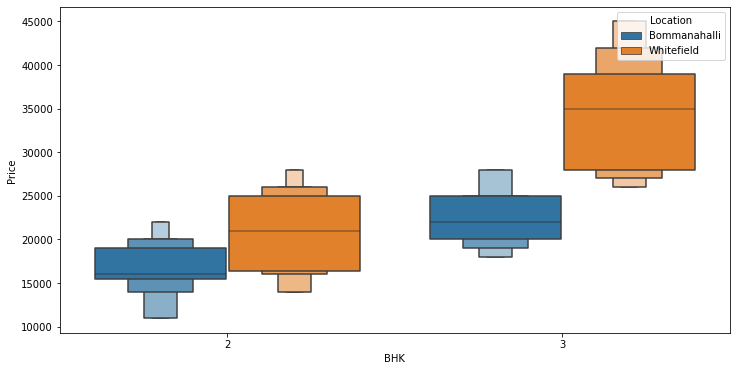

In [100]:
plt.figure(figsize = (12, 6))

sns.boxenplot(x = 'BHK', y = 'Price', hue = 'Location', data = houseDF);

Houses in Bommanahalli has lower prices than those in Whitefield. Also the houses having *Bedroom-Hall-Kitchen* value 3 has more price.

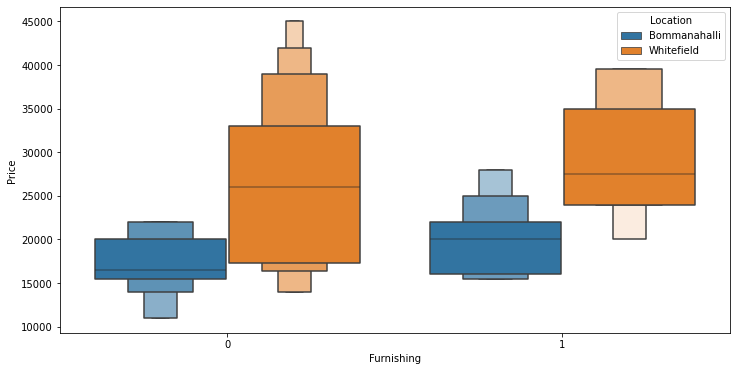

In [101]:
plt.figure(figsize = (12, 6))

sns.boxenplot(x = 'Furnishing', y = 'Price', hue = 'Location', data = houseDF);

This is a weak parameter for guessing the house price.

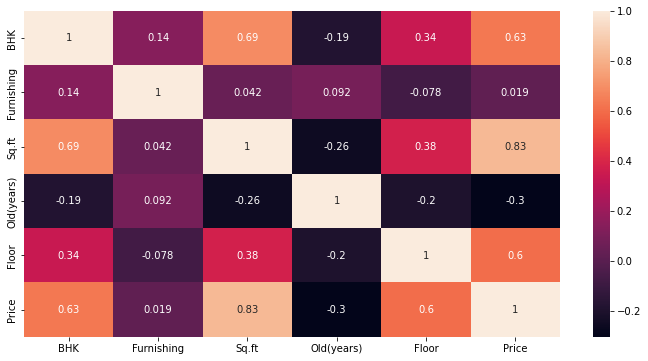

In [102]:
plt.figure(figsize = (12, 6))

corrM = houseDF.corr()

sns.heatmap(corrM, annot = True);

Most important features are BHK, Area (Sq.ft) and the floor.

### Label encoding the Location

In [103]:
houseDF['Location'].value_counts()

Bommanahalli    504
Whitefield      496
Name: Location, dtype: int64

In [104]:
from sklearn.preprocessing import LabelEncoder

location_le = LabelEncoder()

houseDF['Location'] = location_le.fit_transform(houseDF['Location'])
houseDF['Location'].value_counts()

0    504
1    496
Name: Location, dtype: int64

Bommanahalli is 0

Whitefield is 1

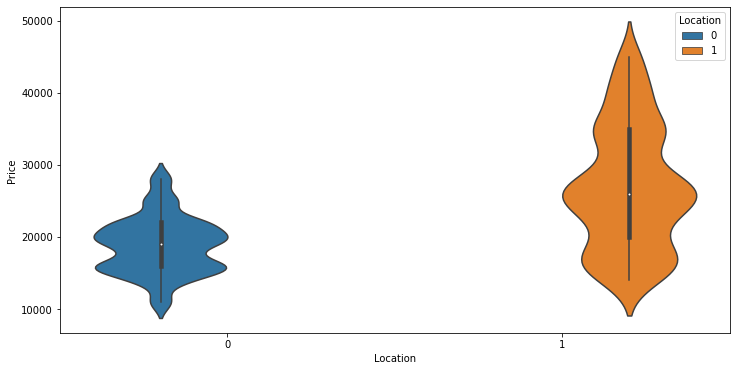

In [105]:
plt.figure(figsize = (12, 6))

sns.violinplot(x = 'Location', y = 'Price', hue = 'Location', data = houseDF);

Whitefield despite having lower number of houses has a wide range of prices.

### Independent and dependent features

In [106]:
house_X = houseDF.drop(columns = ['Price'])
house_X.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor
0,0,3,1,3000,1,3
1,0,3,1,1650,10,0
2,1,2,0,1000,5,3
3,1,3,0,1600,1,9
4,1,2,1,1200,5,1


In [107]:
house_y = houseDF.iloc[:, -1]
house_y.head()

0    28000
1    18000
2    16400
3    27000
4    20000
Name: Price, dtype: int64

### Stratified splitting based on location

In [108]:
from sklearn.model_selection import train_test_split

house_X_train, house_X_test, house_y_train, house_y_test = train_test_split(house_X, house_y, test_size = 0.33,
                                                                            stratify = house_X[['Location', 'BHK']],
                                                                            random_state = 1)

### Feature Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler

house_scaler = MinMaxScaler()

house_X_train = house_scaler.fit_transform(house_X_train)
house_X_test = house_scaler.transform(house_X_test)

### The Model

In [110]:
from sklearn.ensemble import RandomForestRegressor

house_reg = RandomForestRegressor()
house_reg.fit(house_X_train, house_y_train)
house_pred = house_reg.predict(house_X_test)

from sklearn.metrics import r2_score

acc = r2_score(house_y_test, house_pred) # R2 Accuracy
print(f'This model has an accuracy of {round(acc * 100, 2)} %.')

This model has an accuracy of 100.0 %.


The model made using random forest regressor is the most accurate model.

### Final Conclusion

The above model can make accurate predictions of house prices most of the time.

#### Predicting from the user input

In [111]:
def predict_house_price_from_user():
    # Inputing location
    print('Enter the location option NUMBER:\n1. Bommanahalli\n2. Whitefield: ')
    inp = int(input())
    location = 'Bommanahalli' if inp == 1 else 'Whitefield' if inp == 2 else 'Invalid'
    if location == 'Invalid':
        print('Exiting')
        return
    location = location_le.transform([location])
    # Inputing BHK (Bedroom Hall Kitchen)
    print('Enter the BHK (Bedroom Hall Kitchen) units (2 or 3): ', end = '')
    bhk = int(input())
    if bhk not in [2, 3]:
        print('Exiting. Only 2 or 3 BHK are available.')
        return
    # Furnishing
    print('Furnishing (0 if not required else 1): ', end = '')
    furnishing = int(input())
    if furnishing not in [0, 1]:
        print('Invalid input. Exiting.')
        return
    # Area
    print('Enter area in square feet: ', end = '')
    sqft = int(input())
    # Years old
    print('How many years old? ', end = '')
    old = int(input())
    # Floors
    print('How many floors?: ', end = '')
    floor = int(input())
    datapoint = house_scaler.transform(pd.DataFrame({'Location': location, 'BHK': bhk, 'Furnishing': furnishing, 'Sq.ft': sqft, 
                                        'Old(years)': old, 'Floor': floor}))
    price = house_reg.predict(datapoint)
    return price
    

price = predict_house_price_from_user()[0]
print('The price would be: $' + str(price))

Enter the location option NUMBER:
1. Bommanahalli
2. Whitefield: 
2
Enter the BHK (Bedroom Hall Kitchen) units (2 or 3): 3
Furnishing (0 if not required else 1): 1
Enter area in square feet: 2400
How many years old? 3
How many floors?: 2
The price would be: $39160.0


## References

1. Stratified Cross Validation in Machine Learning (https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e)

2. Correlation (https://en.wikipedia.org/wiki/Correlation)

3. Feature Scaling in correct way (https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i)

4. Random Forest Regression (https://www.geeksforgeeks.org/random-forest-regression-in-python/)

5. Seaborn multiple lineplots (https://www.marsja.se/seaborn-line-plots-multiple/)